In [1]:
import pandas as pd
wine = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-1_wine.csv', index_col = 0)
wine

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df = wine.filter(['Alcohol','Malicacid','Ash','Magnesium','Hue'])
df

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43,127,1.04
1,13.20,1.78,2.14,100,1.05
2,13.16,2.36,2.67,101,1.03
3,14.37,1.95,2.50,113,0.86
4,13.24,2.59,2.87,118,1.04
...,...,...,...,...,...
173,13.71,5.65,2.45,95,0.64
174,13.40,3.91,2.48,102,0.70
175,13.27,4.28,2.26,120,0.59
176,13.17,2.59,2.37,120,0.60


In [3]:
from numpy.random import randint
import numpy as np

df_m = df.copy()
for col in ['Alcohol','Ash']:
    random_idx = randint(0, len(df), 25) # 복원추출
    df_m.loc[random_idx, col] = np.nan
    print(random_idx)
    print(df_m.isna().sum())
df_m.isna().sum()

[ 83 105 111 114   7  16  47  71  61  54  55 144  64  44  26  73 117 172
  97 166  17 114  80 124  40]
Alcohol      24
Malicacid     0
Ash           0
Magnesium     0
Hue           0
dtype: int64
[ 14  16 130  91  38 129  47 126  78  51 149 169  47  20  58  48  57 109
 170 158   8  92 172 175  24]
Alcohol      24
Malicacid     0
Ash          24
Magnesium     0
Hue           0
dtype: int64


Alcohol      24
Malicacid     0
Ash          24
Magnesium     0
Hue           0
dtype: int64

In [4]:
df_m[['Alcohol','Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,14.20,2.45
6,14.39,2.45
7,NaN,2.61
8,14.83,NaN
9,13.86,2.27


In [5]:
df_imp = df_m.fillna(0)
print(df_imp[['Alcohol','Ash']])

     Alcohol   Ash
0      14.23  2.43
1      13.20  2.14
2      13.16  2.67
3      14.37  2.50
4      13.24  2.87
..       ...   ...
173    13.71  2.45
174    13.40  2.48
175    13.27  0.00
176    13.17  2.37
177    14.13  2.74

[178 rows x 2 columns]


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
wine_imp1 = imputer.fit_transform(df_m) # np.array

wine_imp1 = pd.DataFrame(wine_imp1, columns = df_m.columns)
wine_imp1

,Alcohol,Malicacid,Ash,Magnesium,Hue
0,14.23,1.71,2.43000,127.0,1.04
1,13.20,1.78,2.14000,100.0,1.05
2,13.16,2.36,2.67000,101.0,1.03
3,14.37,1.95,2.50000,113.0,0.86
4,13.24,2.59,2.87000,118.0,1.04
...,...,...,...,...,...
173,13.71,5.65,2.45000,95.0,0.64
174,13.40,3.91,2.48000,102.0,0.70
175,13.27,4.28,2.35961,120.0,0.59
176,13.17,2.59,2.37000,120.0,0.60


In [7]:
Al_mean = df_m['Alcohol'].mean()
As_mean = df_m['Ash'].mean()
Al_mean.round(2), As_mean.round(2)

(12.99, 2.36)

In [8]:
wine_imp2 = df_m.copy()
for feat in ['Alcohol','Ash']:
    missing_idx = wine_imp2[wine_imp2[feat].isna() == True].index
    wine_imp2.loc[missing_idx, feat] = wine[feat].sample(len(missing_idx)).values
wine_imp2.isna().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

In [9]:
wine_imp4 = df_m.interpolate(method='linear')
wine_imp4.isna().sum()

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64

In [10]:
wine = df.copy()
IQR = wine['Malicacid'].quantile(0.75) - wine['Malicacid'].quantile(0.25)
top = wine['Malicacid'].quantile(0.75) + IQR*1.5
down = wine['Malicacid'].quantile(0.25) - IQR*1.5

out_id = wine[(wine['Malicacid'] >= top) | (wine['Malicacid'] <= down)].index
out_id


Int64Index([123, 137, 173], dtype='int64')

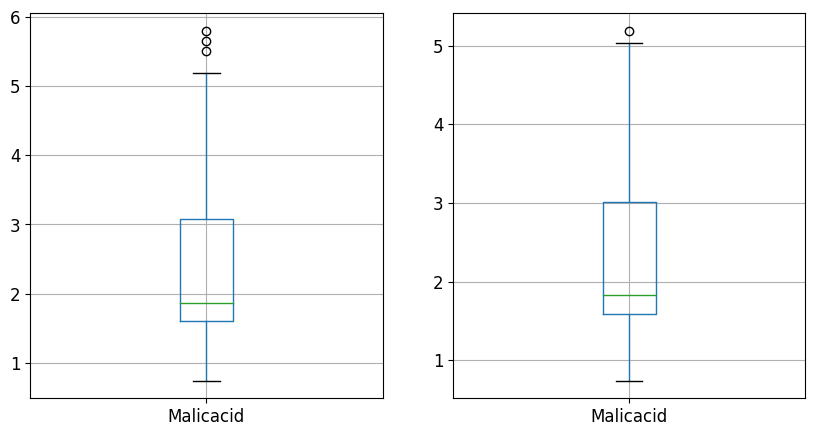

In [11]:
prep_df = wine[['Malicacid']].drop(out_id, axis=0)
prep_df

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1,2)
for data, ax, title in zip([wine[['Malicacid']], prep_df], axes, ['Before', 'After']):
    data.boxplot(ax=ax)
plt.show()

In [12]:
prep_df2 = wine[['Malicacid']].clip(down,top)
prep_df2

,Malicacid
0,1.7100
1,1.7800
2,2.3600
3,1.9500
4,2.5900
...,...
173,5.3025
174,3.9100
175,4.2800
176,2.5900


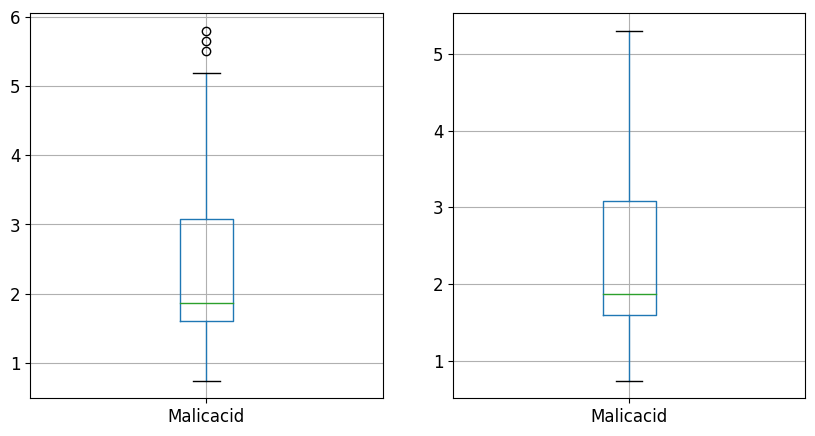

In [13]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2)
for data, ax, title in zip([wine[['Malicacid']], prep_df2 ], axes, ['Before', 'After']):
    data.boxplot(ax=ax)

In [14]:
from sklearn.datasets import load_breast_cancer
from collections import Counter
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']],
              columns = list(data.feature_names) + ['target'])

In [15]:
df = df.filter(['mean radius', 'mean texture', 'mean area', 'target'])
df

,mean radius,mean texture,mean area,target
0,17.99,10.38,1001.0,0.0
1,20.57,17.77,1326.0,0.0
2,19.69,21.25,1203.0,0.0
3,11.42,20.38,386.1,0.0
4,20.29,14.34,1297.0,0.0
...,...,...,...,...
564,21.56,22.39,1479.0,0.0
565,20.13,28.25,1261.0,0.0
566,16.60,28.08,858.1,0.0
567,20.60,29.33,1265.0,0.0


In [16]:
df1 = df[df['target']==0].sample(50)
df2 = df[df['target']==1].sample(250)
imb_df = pd.concat([df1,df2]).reset_index(drop=True)
imb_df

,mean radius,mean texture,mean area,target
0,20.73,31.12,1419.0,0.0
1,14.42,19.77,642.5,0.0
2,27.22,21.87,2250.0,0.0
3,11.08,18.83,361.6,0.0
4,23.21,26.97,1670.0,0.0
...,...,...,...,...
295,13.05,19.31,527.2,1.0
296,12.18,17.84,451.1,1.0
297,10.65,25.22,347.0,1.0
298,10.86,21.48,360.5,1.0


In [17]:
features = imb_df.drop('target', axis=1)
target = imb_df['target']

In [19]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
bal_features, bal_target = os.fit_resample(features, target)
Counter(target), Counter(bal_target)

(Counter({0.0: 50, 1.0: 250}), Counter({0.0: 250, 1.0: 250}))

<AxesSubplot:title={'center':'imbalanced'}, xlabel='mean radius', ylabel='mean texture'>

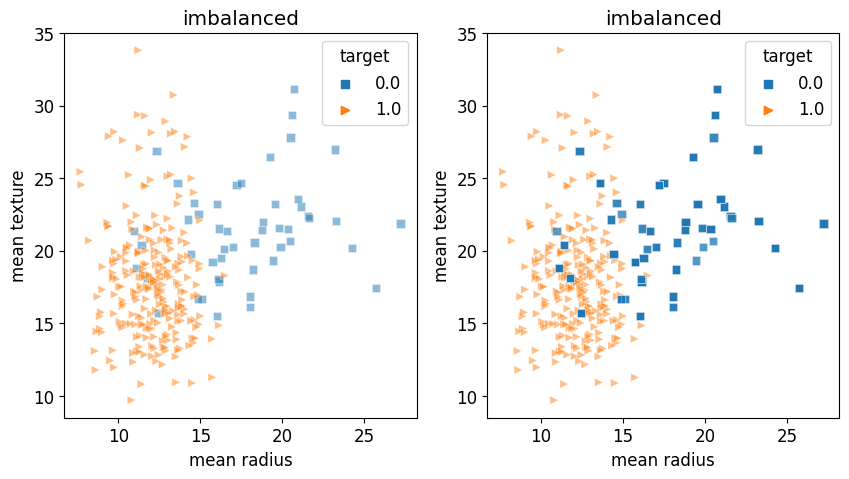

In [20]:
import seaborn as sns
over_df1 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("imbalanced")
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=imb_df,
               ax=ax[0], alpha=0.5, style='target',markers=['s','>'])

ax[1].set_title("imbalanced")
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=over_df1,
               ax=ax[1], alpha=0.5, style='target',markers=['s','>'])




<AxesSubplot:title={'center':'imbalanced'}, xlabel='mean radius', ylabel='mean texture'>

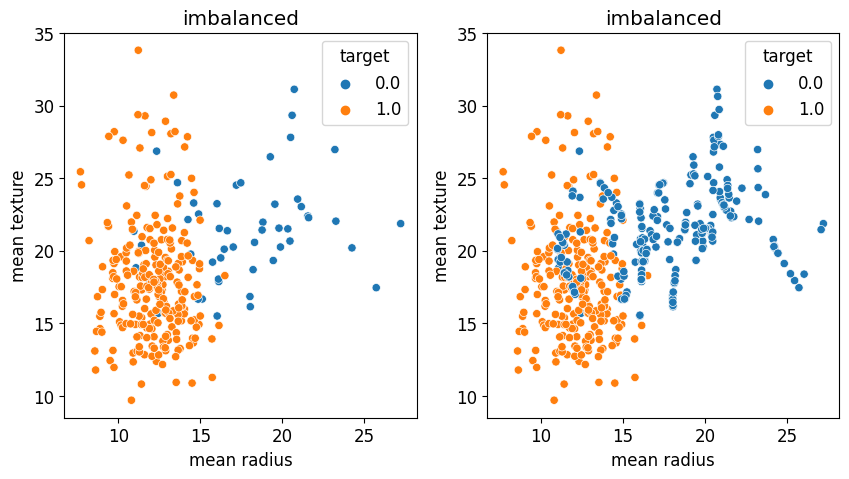

In [21]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0, k_neighbors=3)
bal_feature, bal_target = os.fit_resample(features, target)

over_df2 = pd.DataFrame(np.c_[bal_feature, bal_target], columns=imb_df.columns)
over_df2

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].set_title("imbalanced")
sns.scatterplot(x='mean radius', y='mean texture', hue = 'target', data=imb_df, ax=ax[0])

ax[1].set_title("imbalanced")
sns.scatterplot(x='mean radius', y='mean texture', hue = 'target', data=over_df2, ax=ax[1])


<AxesSubplot:title={'center':'oversampled'}, xlabel='mean radius', ylabel='mean texture'>

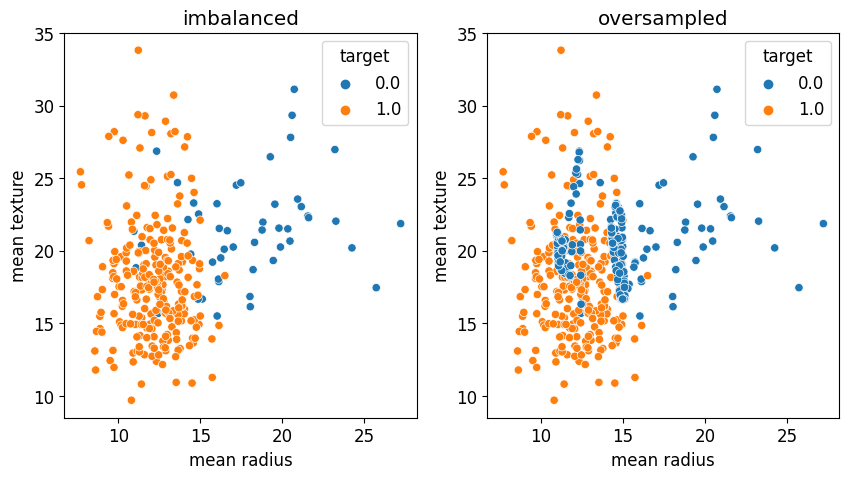

In [22]:
from imblearn.over_sampling import BorderlineSMOTE
os = BorderlineSMOTE(random_state=0, k_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

import seaborn as sns
over_df3 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].set_title('imbalanced')
sns.scatterplot(x= 'mean radius', y = 'mean texture', hue='target', ax=ax[0], data = imb_df)

ax[1].set_title('oversampled')
sns.scatterplot(x= 'mean radius', y = 'mean texture', hue='target', ax=ax[1], data = over_df3)

Counter({1.0: 250, 0.0: 50}) Counter({0.0: 252, 1.0: 250})


<AxesSubplot:title={'center':'resampled'}, xlabel='mean radius', ylabel='mean texture'>

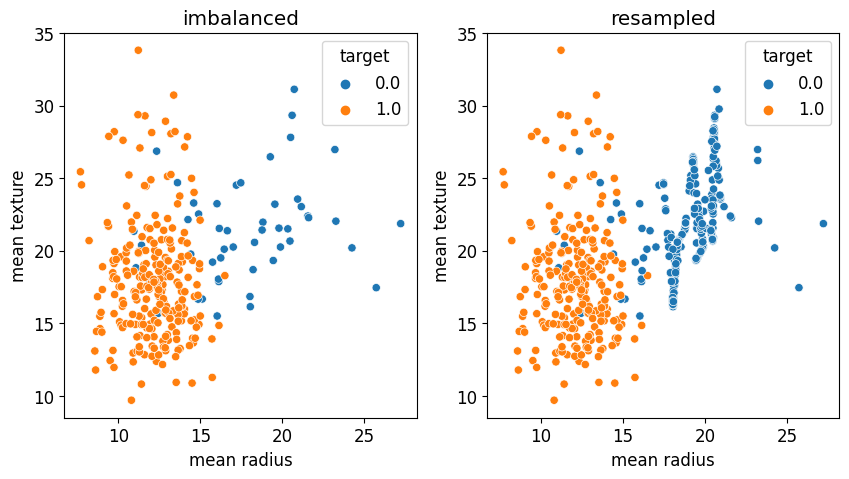

In [23]:
from imblearn.over_sampling import KMeansSMOTE
os = KMeansSMOTE(random_state=0, k_neighbors=3)

bal_features, bal_target = os.fit_resample(features, target)
print(Counter(target), Counter(bal_target))

over_df4 = pd.DataFrame(np.c_[bal_features, bal_target], columns=imb_df.columns)

fig, ax = plt.subplots(1,2 , figsize=(10,5))
ax[0].set_title('imbalanced')
sns.scatterplot(x='mean radius',y='mean texture', hue='target', data=imb_df, ax = ax[0])

ax[1].set_title('resampled')
sns.scatterplot(x='mean radius',y='mean texture', hue='target', data=over_df4, ax = ax[1])


Counter({0.0: 250, 1.0: 250}) Counter({1.0: 250, 0.0: 50})


<AxesSubplot:title={'center':'resampled'}, xlabel='mean radius', ylabel='mean texture'>

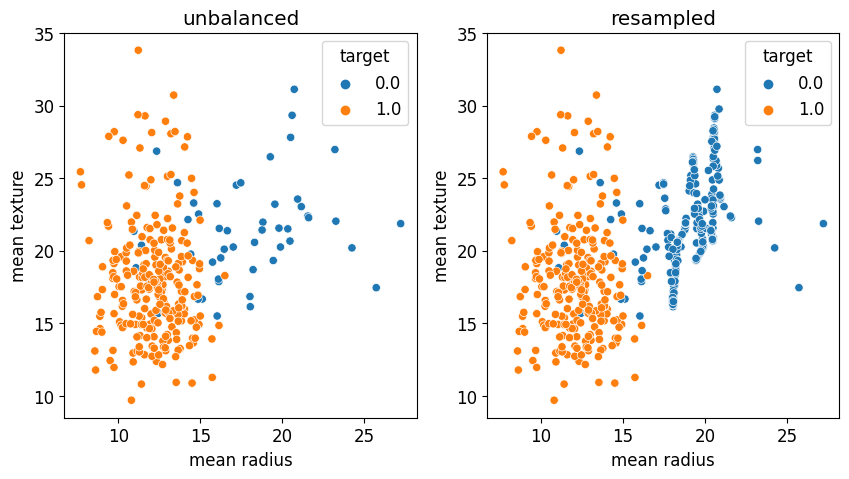

In [24]:
from imblearn.over_sampling import SVMSMOTE
os = SVMSMOTE(random_state=0, k_neighbors=3)

re_feature, re_target = os.fit_resample(features, target)
print(Counter(re_target), Counter(target))

over_df5 = pd.DataFrame(np.c_[re_feature, re_target], columns=imb_df.columns)

fig, ax = plt.subplots(1, 2 , figsize=(10,5))
ax[0].set_title("unbalanced")
ax[1].set_title("resampled")

sns.scatterplot(x = 'mean radius', y= 'mean texture', hue='target', data=imb_df, ax=ax[0])
sns.scatterplot(x = 'mean radius', y= 'mean texture', hue='target', data=over_df4, ax=ax[1])

Counter({1.0: 250, 0.0: 50}) Counter({0.0: 256, 1.0: 250})


<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

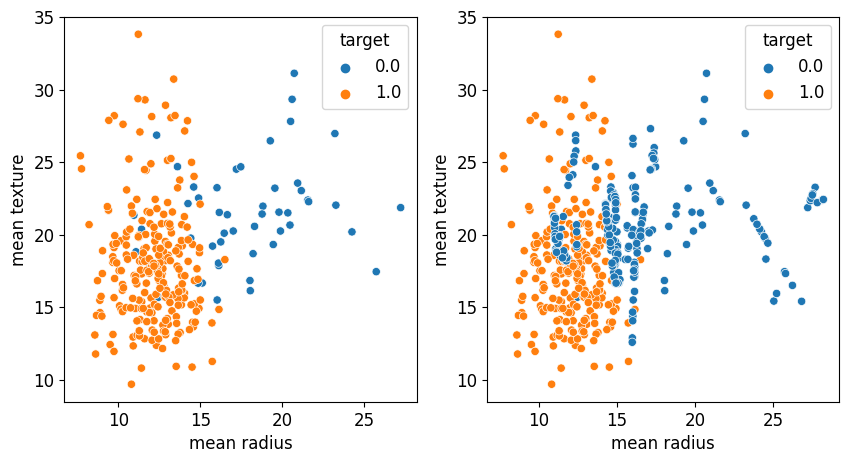

In [25]:
from imblearn.over_sampling import ADASYN
os = ADASYN(random_state=0, n_neighbors=3)
bal_features, bal_target = os.fit_resample(features, target)

print(Counter(target), Counter(bal_target))
over_df6 = pd.DataFrame(np.c_[bal_features, bal_target], columns = imb_df.columns)


fig, ax = plt.subplots(1,2 , figsize=(10,5))
sns.scatterplot(x = 'mean radius', y= 'mean texture', hue='target', data = imb_df, ax=ax[0])
sns.scatterplot(x = 'mean radius', y= 'mean texture', hue='target', data = over_df5, ax=ax[1])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
data = [imb_df, over_df1,over_df2, over_df3, over_df4, over_df5, over_df6 ]
data_title = ['no oversampling', ' RandomOverSampling','SMOTE','BorderlineSMOTE','KMeansSMOTE','SVMSMOTE','ADASYN']

scores = pd.DataFrame(index =['Train acc','Test acc', 'Train F1', 'Test F1'],
                     columns=data_title)

for df, title in zip(data, data_title):
    features = df.drop('target', axis=1)
    target = df['target']
    X_train, X_test, y_train, y_test = train_test_split(features,target)
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    scores.loc['Train acc', title] = accuracy_score(y_train, pred_train)
    scores.loc['Test acc', title] = accuracy_score(y_test, pred_test)
    
    scores.loc['Train F1', title] = f1_score(y_train, pred_train)
    scores.loc['Test F1', title] = f1_score(y_test, pred_test)

scores

,no oversampling,RandomOverSampling,SMOTE,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE,ADASYN
Train acc,0.946667,0.901333,0.893333,0.741333,0.968085,0.818667,0.754617
Test acc,0.946667,0.904,0.888,0.776,0.97619,0.848,0.724409
Train F1,0.968912,0.904393,0.896907,0.750643,0.968254,0.825641,0.753316
Test F1,0.96875,0.90625,0.895522,0.784615,0.977444,0.840336,0.761905


# Feature Scalling

In [27]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-4_diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
X = diabetes.filter(['Pregnancies', 'BloodPressure', 'BMI', 'Age'])
y = diabetes['Outcome']

In [29]:
X.describe().loc[['mean','std','max','min'], :]

,Pregnancies,BloodPressure,BMI,Age
mean,3.845052,69.105469,31.992578,33.240885
std,3.369578,19.355807,7.884160,11.760232
max,17.000000,122.000000,67.100000,81.000000
min,0.000000,0.000000,0.000000,21.000000


In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_X = ss.fit_transform(X)
ss_X = pd.DataFrame(ss_X, columns= X.columns)
ss_X.describe().loc[['mean','std','max','min'], :].apply(lambda x: round(x, 2))

,Pregnancies,BloodPressure,BMI,Age
mean,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
max,3.91,2.73,4.46,4.06
min,-1.14,-3.57,-4.06,-1.04


In [31]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_X = mm.fit_transform(X)
mm_X = pd.DataFrame(mm_X, columns = X.columns)
mm_X.describe().loc[['mean','std','min','max'], :]

,Pregnancies,BloodPressure,BMI,Age
mean,0.22618,0.566438,0.476790,0.204015
std,0.19821,0.158654,0.117499,0.196004
min,0.00000,0.000000,0.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs_X = rs.fit_transform(X)
rs_X = pd.DataFrame(rs_X, columns = X.columns)
rs_X.describe().loc[['mean','std','min','max'],:]

,Pregnancies,BloodPressure,BMI,Age
mean,0.169010,-0.160807,-0.000798,0.249464
std,0.673916,1.075323,0.847759,0.691778
min,-0.600000,-4.000000,-3.440860,-0.470588
max,2.800000,2.777778,3.774194,3.058824


In [33]:
from sklearn.preprocessing import QuantileTransformer
qtu = QuantileTransformer(output_distribution='uniform', n_quantiles=len(X))
qtu_X = qtu.fit_transform(X)
qtu_X = pd.DataFrame(qtu_X, columns=X.columns)
qtu_X.describe().loc[['mean','std','min','max'],:]

,Pregnancies,BloodPressure,BMI,Age
mean,0.489773,0.499110,0.499977,0.496769
std,0.303331,0.290718,0.289383,0.294365
min,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

data = [X, ss_X, mm_X, rs_X, qtu_X]
y = diabetes['Outcome']
data_title=['no scaling', 'StandardScaler', 'MinMaxScaler', 'RobustScaler', 'QuantileUniform']
scores = pd.DataFrame(index = ['Train acc', 'Test acc', 'Train F1', 'Test F1'], columns=data_title)
coeffs = pd.DataFrame(index=data_title, columns=X.columns)
for df, title in zip(data, data_title):
    X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=0)
    lr = LogisticRegression(max_iter=300)
    lr.fit(X_train, y_train)
    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    scores.loc['Train acc', title]= accuracy_score(y_train, pred_train)
    scores.loc['Test acc', title]= accuracy_score(y_test, pred_test)
    scores.loc['Train F1', title]= f1_score(y_train, pred_train)
    scores.loc['Test F1', title]= f1_score(y_test, pred_test)
    coeffs.loc[title, :] = lr.coef_

In [35]:
scores

,no scaling,StandardScaler,MinMaxScaler,RobustScaler,QuantileUniform
Train acc,0.6875,0.689236,0.682292,0.689236,0.701389
Test acc,0.692708,0.692708,0.682292,0.692708,0.692708
Train F1,0.470588,0.471976,0.403909,0.471976,0.50289
Test F1,0.40404,0.40404,0.26506,0.40404,0.427184


In [36]:
coeffs

,Pregnancies,BloodPressure,BMI,Age
no scaling,0.0646618,-0.00801469,0.111769,0.0412734
StandardScaler,0.217069,-0.149354,0.866795,0.478468
MinMaxScaler,0.948545,-0.181464,3.9048,1.81628
RobustScaler,0.321641,-0.137037,1.01617,0.684446
QuantileUniform,0.0664064,-0.301756,2.34018,2.29937


# realestate data transform

In [37]:
import pandas as pd
realestate = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-4_BHP.csv')
realestate = realestate.dropna().reset_index(drop=True)
X = realestate[['bath','balcony']]
y = realestate[['price']]

In [38]:
from sklearn.preprocessing import PowerTransformer
PTB = PowerTransformer(method='box-cox')
PTY = PowerTransformer(method='yeo-johnson')

y_ptb = pd.DataFrame(PTB.fit_transform(y), columns=y.columns)
y_pty = pd.DataFrame(PTY.fit_transform(y), columns=y.columns)
y_ptb_inv = pd.DataFrame(PTB.inverse_transform(y_ptb), columns=y.columns)

In [39]:
rank_X = X.rank(ascending=False)
rank_X.describe().loc[['mean','std','min','max'],:]

,bath,balcony
mean,3748.500000,3748.50000
std,1926.118911,2010.62683
min,2.000000,503.00000
max,7282.500000,7295.50000


In [40]:
binned = pd.cut(X['bath'], 4)
freq_df = pd.DataFrame(binned.value_counts()).reset_index().rename(columns=
            {'index':'계급', 'bath':'빈도'}).sort_values(by='계급', ascending=True)

bin_edges = [0,2,4,6, float('inf')]
binned2 = pd.cut(X['bath'], bin_edges, right=False)
freq_df2 = pd.DataFrame(binned2.value_counts()).reset_index().rename(columns=
                        {'index':'계급','bath':'빈도'}).sort_values(by='계급',ascending=True)

In [41]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=3, strategy='quantile')
kb.fit(pd.DataFrame(X['bath']))

kbbin = kb.bin_edges_[0]
bin_edges = []
for i in range(len(kbbin)):
    if len(kbbin)-1 != i:
        tup = (int(kbbin[i]), int(kbbin[i+1]))
        bin_edges.append(tup)
kbinned = kb.transform(pd.DataFrame(X['bath']))
result = pd.DataFrame(kbinned.toarray(), columns=bin_edges)
result.head()


,"(1, 2)","(2, 3)","(3, 9)"
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


# 범주형 변수 변환
## One-Hot / dummy-coding / 숫자로 표현된 범주형 특성 변환 / label 인코딩 / 특징해싱 / 빈도 인코딩

In [42]:
realestate.describe(include='object')

,area_type,availability,location,size,society,total_sqft
count,7496,7496,7496,7496,7496,7496
unique,4,74,634,15,2592,1682
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,6017,5709,397,3411,80,172


In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
result = pd.DataFrame(ohe.fit_transform(realestate[['area_type']]).toarray(), 
                      columns= ohe.get_feature_names())
result.head(5)

/Users/myhwan/opt/anaconda3/envs/DS3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Built-up Area,x0_Carpet Area,x0_Plot Area,x0_Super built-up Area
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


In [44]:
result2 = pd.get_dummies(realestate[['area_type']], drop_first=True)
result2.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [45]:
realestate['area_type'] = realestate['area_type'].map({'Super built-up  Area':0,
                                                      'Plot  Area':1,
                                                      'Built-up  Area':2,
                                                      'Carpet  Area':3})

realestate[['area_type']].describe(include='all')

,area_type
count,7496.000000
mean,0.365662
std,0.763294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [46]:
realestate['area_type'] = realestate['area_type'].astype('int')
realestate['area_type'].describe(include='all')

count    7496.000000
mean        0.365662
std         0.763294
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: area_type, dtype: float64

In [47]:
# 수치형이지만 범주형 변수로 해석해야 함
realestate['area_type'] = realestate['area_type'].astype('category')
realestate['area_type'].describe(include='all')

count     7496
unique       4
top          0
freq      6017
Name: area_type, dtype: int64

In [48]:
realestate['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 RK', '4 BHK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '2 Bedroom',
       '6 BHK', '7 BHK', '6 Bedroom'], dtype=object)

In [49]:
realestate['area_type']

0       0
1       1
2       0
3       0
4       1
       ..
7491    0
7492    0
7493    2
7494    2
7495    0
Name: area_type, Length: 7496, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [50]:
realestate['area_type'].value_counts()

0    6017
2    1158
1     269
3      52
Name: area_type, dtype: int64

In [51]:
realestate['area_type'].map( realestate['area_type'].value_counts()  )

0       6017
1        269
2       6017
3       6017
4        269
        ... 
7491    6017
7492    6017
7493    1158
7494    1158
7495    6017
Name: area_type, Length: 7496, dtype: category
Categories (4, int64): [6017, 269, 1158, 52]

# Practice


1. 포르투갈 은행의 정기예금 프로모션 전화 데이터
- 고객의 특징을 나타내는 입력 변수와 정기예금에 가입했는지 여부를 나타내는 출력 변수로 구성  
시각화 방법을 포함하여 다음 데이터의 결측치와 이상치를 확인하고 합리적인 전처리

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,no


In [62]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
month        4521 non-null object
y            4521 non-null object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


(None,
 age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 month        0
 y            0
 dtype: int64)

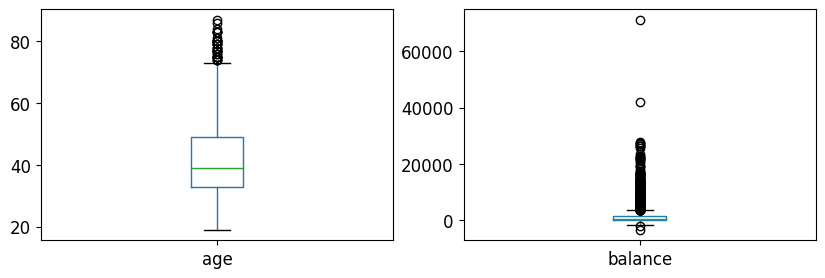

In [68]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,3)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
df.plot(kind='box', subplots=True)
plt.show()


전체 데이터 중, 수치형 변수인 age, balance에 이상치
- age의 경우 이상치가 합리적인 수준
- balance의 경우 이상치가 전체 데이터 대비 극단적이라, 데이터 소실이 없는 조정을 적용 하도록 하자

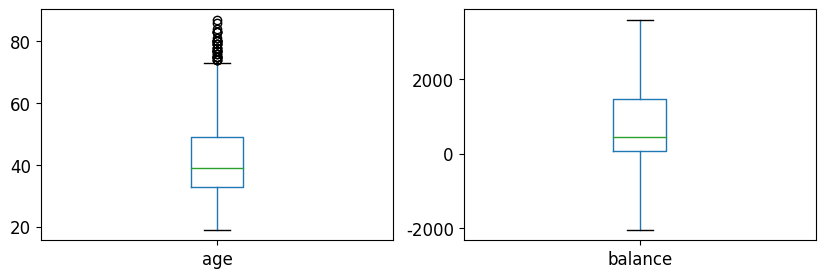

In [77]:
IQR = df['balance'].quantile(0.75) - df['balance'].quantile(0.25)
top = df['balance'].quantile(0.75) + IQR*1.5
down = df['balance'].quantile(0.25) - IQR*1.5

df2 = df.copy()
df2['balance'] = df['balance'].clip(down, top)

plt.rcParams['figure.figsize'] = (10,3)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
df2.plot(kind='box', subplots=True)
plt.show()


# 2
해당 데이터에 있는 범주형 변수를 전처리 하는 방법을 2가지 이상 설명  
각 범주형 변수에 대한 적절한 전처리

- 순서가 있는 범주형 (서열척도)
    - education -> 레이블인코딩
- 순서가 없는 범주형 (명목척도)
    - others -> 더미코딩 (범주가 n개 일 때, 가변수 n-1개 생성하여 다중공선성을 방지하는 변수 변환)    

In [83]:
# binary variable transform
df3 = df2.copy()
for col in ['default','housing','loan', 'y']:
    df3[col] = df3[col].map({'yes':1,'no':0})

In [84]:
df3['education'] = df3['education'].map({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0})

df3 = pd.get_dummies(df3, columns=['marital', 'job', 'contact' ,'month'])
df3.head()

,age,education,default,balance,housing,loan,y,marital_divorced,marital_married,marital_single,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,2,0,3596.5,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,35,3,0,1350.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,30,3,0,1476.0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,2,0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# 3
- 수치형 변수 전처리하는 방법 2가지 이상 설명
- 각 수치형 변수에 적절한 전처리 진행


age / balanace는 수치형 변수인데, 단위의 차이가 큼.
특성간의 척도가 크게 다를 경우 회귀계수가 왜곡되거나 학습이 제대로 이루어지지 않을 수 있어, 변수 변환 필요

feature scaling -> standardization / min-max scaling
- standardization : 이상치의 영향을 받음 / min, max의 제한이 없으므로 특성 범위가 여전히 클 수 있음
- minMax : 모든 특성이 정확하게 0,1 사이에 위치하도록 데이터 변경 / 처음부터 범위가 정해진 변수는 minmax가 자연스러움 / 이상치에 영향받기 쉬움


In [94]:
df3.head()

,age,education,default,balance,housing,loan,y,marital_divorced,marital_married,marital_single,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,2,0,3596.5,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,35,3,0,1350.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,30,3,0,1476.0,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,2,0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
ss = StandardScaler()
df3[['age','balance']] = pd.DataFrame(ss.fit_transform(df[['age','balance']]), columns = ['age','balanace'])
df3.head()

,age,education,default,balance,housing,loan,y,marital_divorced,marital_married,marital_single,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.056270,1,0,0.121072,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.772583,2,0,1.118644,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.583458,3,0,-0.024144,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.056270,3,0,0.017726,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1.686036,2,0,-0.472753,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# 4
클래스 불균형이 있는지 확인하고, 그렇게 생각한 이유

y : 4000 / 521 로 클래스 불균형이 존재

In [119]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

# 5
클래스 불균형이 있는 데이터를 처리하는 방법들 중 2가지를 들어 그 방법의 장단점을 서술하고 그 중 하나를 선택하여 전처리를 진행


undersampling / oversampling / smote

데이터 크기가 비교적 작은 경우에 oversampling
- random oversampling / SMOTE / Borderline SMOTE / K-means SMOTE / SVM SMOTE / ADASYM
- random over sampling
    - 예측변수가 질적변수이거나 결측치가 있어도 전처리가 필요 없음. 과적합의 위험
- SVM SMOTE
    - SVM 알고리즘으로 생성되는 support vector 데이터 . 중소수 클래스 데이터를 경계로 삼아 SMOTE적용
    - support vector로 유효한 소수 클래스 데이터가 oversampling
    - 데이터를 학습해서 생성해야 하므로, 시간이 걸림 
    - 예측 변수가 모두 수치형이여야함
    - 결측값이 없어야 함

In [129]:
from imblearn.over_sampling import RandomOverSampler, SVMSMOTE
X = df3.drop('y', axis=1)
y = df3[['y']]
os = SVMSMOTE()
balX, baly = os.fit_resample(X,y)

In [140]:
baly['y'].value_counts()

1    4000
0    4000
Name: y, dtype: int64